- Student name: Nancy Lopez

- Self-Paced

# Wine Quality Control

## Introduction
The wine quality project aims to classify wines as either good or bad quality based on their physical and chemical characteristics. We will create a machine learning model that predicts whether a wine is of good quality or not, which can help wine the management of wine quality.

# Business Problem

A prestigious winery that has built a reputation for producing high-quality red wines. The company's dedication to excellence has garnered a loyal customer base. However, the winery recognizes the paramount importance of continuously delivering exceptional wine and ensuring that every bottle consistently meets or exceeds customer expectations. Does the chemical composition of the wine, including levels of alcohol, acidity, sulfates, and other components, may be key factors in quality assessment?

## Data:
The dataset contains information on the chemical composition of red wines and their associated quality scores. The chemical properties include fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol. The wine quality is rated on a scale from 3 to 8, with scores 7 or above is good wine quality.

**Approach**:
1. Data Exploration: We will begin by exploring the dataset to gain insights into the chemical properties of the wines and the distribution of quality scores.

2. Data Preprocessing: This step involves handling missing values, addressing potential outliers, columns are in order, and preparing the data for modeling.

3. Baseline Model: We will build a predictive model using machine learning algorithms to assess wine quality, starting off with a baseline model.

4. Model Improvement: Once the model is trained and validated, we will explore options for improving.

5. Feature Importance Analysis: We will determine which chemical properties have the most significant influence on wine quality.


**Objective:** The primary objective of this project is to develop a predictive model that can assess the quality of red wine produced by the winery. The model will serve two main purposes:

- Quality Assessment: Create a model that can predict the quality of red wine based on its chemical properties. This will enable the winery to quickly assess the quality of new wine batches as they are produced.
- Quality Improvement: Identify which chemical properties have the most significant impact on wine quality. By understanding these key factors, the winery can focus on optimizing its winemaking process to consistently produce high-quality wines.

## Data Exploration:
We will begin by exploring the dataset to gain insights into the chemical properties of the wines and the distribution of quality scores.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load dataframe
df = pd.read_csv('data/winequality-red.csv')

In [3]:
# Exploring first few rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Check data types and shape of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- df has a total of 1599 rows
- there are 12 columns
- For each column, it displays the following information:
- the number of non-null (non-missing) values in each column.
- the data type for each columns shows to numerical

In [5]:
# Calculate summary statistics for columns
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- **count:** Indicates the number of data points in the dataset, which is 1599.

- **mean:** Represents the average value for each feature. For example, the mean for "fixed acidity" is approximately 8.32.

- **std:** Stands for the standard deviation, which measures the dispersion or spread of the data. A higher standard deviation indicates greater variability in the data.

- **min:** Reflects the minimum value observed in each feature. For instance, the minimum value for "residual sugar" is 0.9.

- **25% (Q1), 50% (Q2 or median), 75% (Q3):** These percentiles divide the data into four equal parts. Q1 (25th percentile) marks the value below which 25% of the data falls. Q2 (50th percentile) is the median, representing the middle value. Q3 (75th percentile) denotes the value below which 75% of the data falls.

- **max:** Denotes the maximum value observed in each feature. For example, the maximum value for "alcohol" is 14.9.

In [6]:
# Checking for any null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null values in the dataframe.

In [7]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

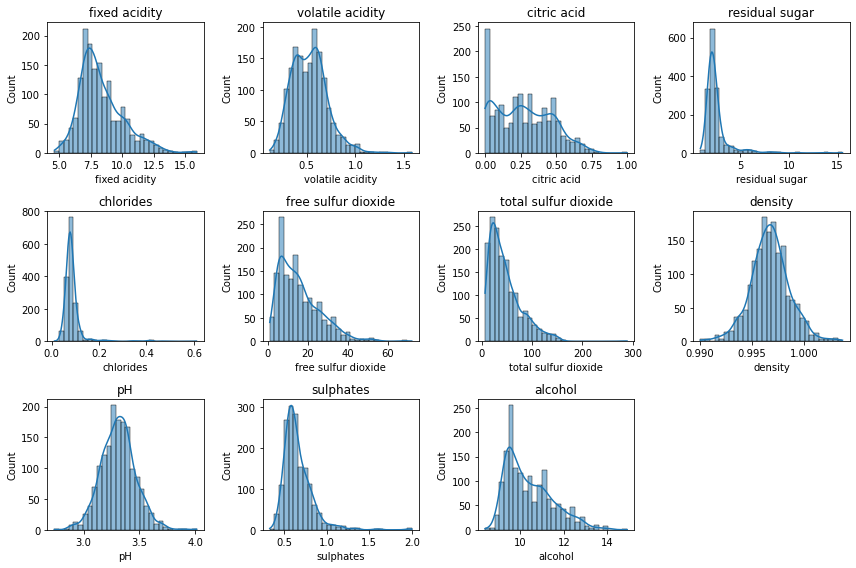

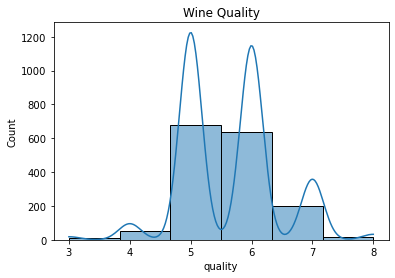

In [8]:
# Create histograms for properties of wine
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):  # Exclude the 'quality' column
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(column)
plt.tight_layout()
plt.show()

# Create a histogram for wine quality
plt.figure(figsize=(6, 4))
sns.histplot(df['quality'], bins=6, kde=True)
plt.title('Wine Quality')
plt.show()


Insights based on histograms we can see most of the features a normally destributed and agian quality of wine seems to surround 5 and 6.

1. **Fixed Acidity:** The distribution of fixed acidity appears to be somewhat right-skewed, with a peak around 7-8. There are relatively fewer observations with very high or very low fixed acidity values.

2. **Volatile Acidity:** The volatile acidity distribution is approximately normally distributed with a peak around 0.5. There are some outliers on the lower and higher ends of the scale.

3. **Citric Acid:** The distribution of citric acid is right-skewed, with a peak around 0.0. Most observations have low citric acid content, but there is a smaller group with higher values.

4. **Residual Sugar:** Residual sugar is right-skewed, with a peak around 1-2. Most wines have low residual sugar content, but there are some outliers with higher levels.

5. **Chlorides:** Chlorides are right-skewed, with a peak around 0.07. Similar to residual sugar, most wines have low chloride content, but some wines have higher values.

6. **Free Sulfur Dioxide:** The distribution of free sulfur dioxide is right-skewed, with a peak around 10-20. There is a relatively small number of observations with very high levels.

7. **Total Sulfur Dioxide:** Total sulfur dioxide is also right-skewed, with a peak around 50-100. There are some wines with extremely high total sulfur dioxide levels.

8. **Density:** The density distribution is approximately normally distributed with a peak around 0.996. There are no significant outliers in this distribution.

9. **pH:** The pH distribution is approximately normally distributed with a peak around 3.3. The values are relatively evenly spread across the range.

10. **Sulphates:** The distribution of sulphates is right-skewed, with a peak around 0.5-0.7. Most wines have moderate sulphate levels, but there are some wines with very high levels.

11. **Alcohol:** Alcohol content is approximately normally distributed with a peak around 9.4. There are no significant outliers in this distribution.

12. **Wine Quality:** The wine quality distribution shows that most wines in the dataset have a quality rating of 5 or 6, with fewer wines rated higher or lower. The distribution is somewhat right-skewed. **We were given wine quality over 7 is considered good "quality".**

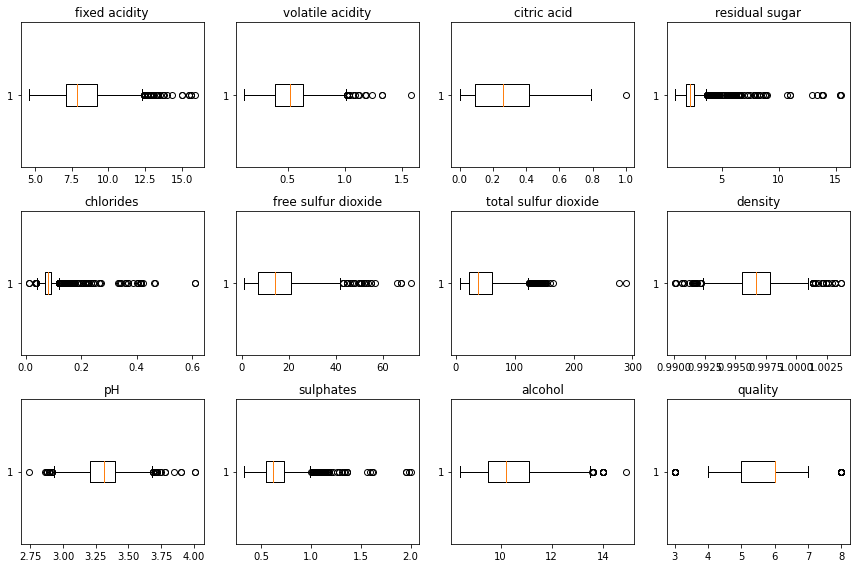

In [9]:
# Creating box plot to determine any potential outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns):
    plt.subplot(3, 4, i + 1)  
    plt.boxplot(df[column], vert=False) 
    plt.title(column) 
    
plt.tight_layout()  
plt.show()

It appears that several columns have outliers, 'fixed acidity,' 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', and 'sulphates'.

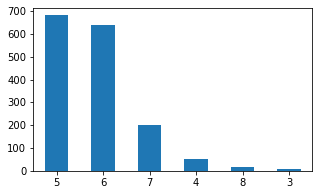

In [11]:
# Plot quality value count
plt.figure(figsize=(5,3))
df['quality'].value_counts().plot(kind='bar')
plt.xticks(rotation=0);

When checking for quality count we can see the wine quality of 5 and 6 are really common out of all.

Lets take a look what features are highly correlated to "quality".
- Before moving foward to correlations it would be a good time to add a 'good_quality' column to our data.

# Data Preprocessing:
   - Determining good and bad quality wine.
   - Address outliers using z-score method.
   - Ensure that the data is in a suitable format for modeling.

#### Creating a new column "good_quality"
This will help identify good quality wine in order to make better-informed decisions in our models later on.

In [12]:
# Creating a classified wine quality column
df['good_quality'] = [1 if x >= 7 else 0 for x in df['quality']]

# dropping quality columns
df = df.drop('quality', axis=1)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


Now we can look at the features correlation values with `'good_quality'`

In [13]:
# Calculate the correlation between 'good_quality' and all other columns
correlation = df.corr()['good_quality']
print(correlation)

fixed acidity           0.120061
volatile acidity       -0.270712
citric acid             0.214716
residual sugar          0.047779
chlorides              -0.097308
free sulfur dioxide    -0.071747
total sulfur dioxide   -0.139517
density                -0.150460
pH                     -0.057283
sulphates               0.199485
alcohol                 0.407315
good_quality            1.000000
Name: good_quality, dtype: float64


We can quickly notice alcohol has the `highest` correlation with wine quality.

- **alcohol (0.407315)**: There is a positive correlation between the alcohol content in the wine and it being of good quality. This suggests that wines with higher alcohol content are more likely to be of good quality.

- **volatile acidity (-0.270712)**: There is a negative correlation between volatile acidity and good quality. In other words, wines with lower volatile acidity are more likely to be of good quality.

- **citric acid (0.214716)**: Wines with a higher citric acid content are more likely to be of good quality. This is a positive correlation.

- **sulphates (0.199485)**: Wines with higher levels of sulphates tend to be of better quality. This is also a positive correlation.

- **density (-0.150460)**: There is a negative correlation between density and good quality. Wines with lower density are more likely to be of good quality.

- **total sulfur dioxide (-0.139517)**: There is a negative correlation, indicating that wines with lower total sulfur dioxide are more likely to be of good quality.

- **fixed acidity (0.120061)**: Wines with higher fixed acidity are slightly more likely to be of good quality. This is a positive correlation, but it's weaker than some of the others.

- **chlorides (-0.097308)**: There is a negative correlation between chlorides and good quality. Wines with lower chloride levels are more likely to be of good quality.

- **free sulfur dioxide (-0.071747)**: There is a negative correlation, indicating that wines with lower levels of free sulfur dioxide are more likely to be of good quality.

- **pH (-0.057283)**: There is a negative correlation between pH and good quality. Wines with lower pH values are more likely to be of good quality.

- **residual sugar (0.047779)**: Wines with slightly higher residual sugar content are more likely to be of good quality, but this correlation is relatively weak.

In [16]:
# Print good_quality counts
print(df['good_quality'].value_counts())

0    1382
1     217
Name: good_quality, dtype: int64


There are **217** instances with a 'good_quality' label of 1, indicating that the dataset contains a smaller number of 'good quality' samples compared to 'not good quality' samples.

Next, we will fix our outliers by using z-score method.

**Benefits of Z-Score Threshold of 3**:

   - **Balancing Act**: A Z-score threshold of 3 is a balance between removing extreme outliers that can severely affect model performance and retaining a sufficient amount of data for meaningful analysis. 

   - **Tuning Possibility**: The choice of a Z-score threshold can be adjusted depending on the specific context of your analysis.

   - **Statistical Justification**: Using Z-scores for outlier removal has a statistical foundation, as it relates each data point's deviation from the mean to the standard deviation. Therefore, it provides a principled approach for identifying and dealing with outliers.


In [17]:
# Creating a copy of df
df_copy = df.copy()

In [18]:
# Detect and remove outliers using Z-score
from scipy import stats
z_scores = np.abs(stats.zscore(df_copy))
threshold = 3
wine_df = df_copy[(z_scores < threshold).all(axis=1)]

We will create a box plot compaing `df` with `wine_df` (no outliers datafrme)

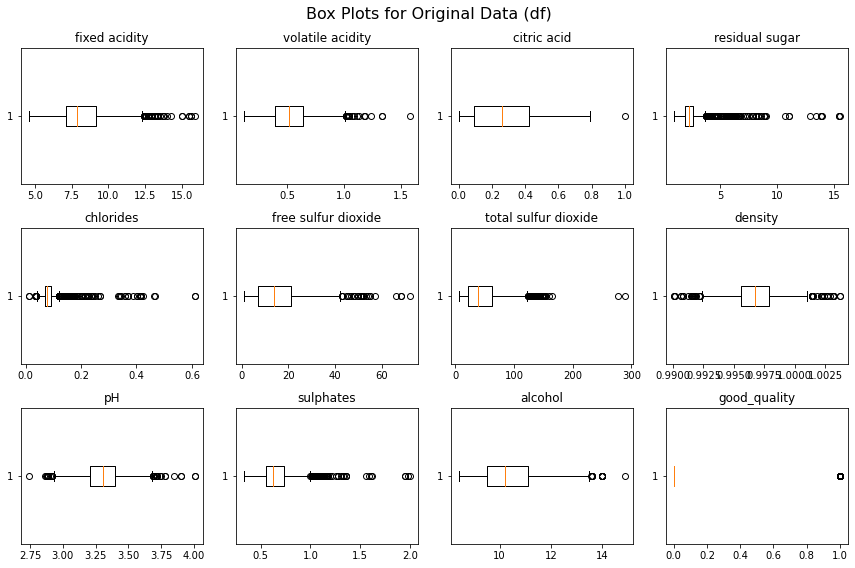

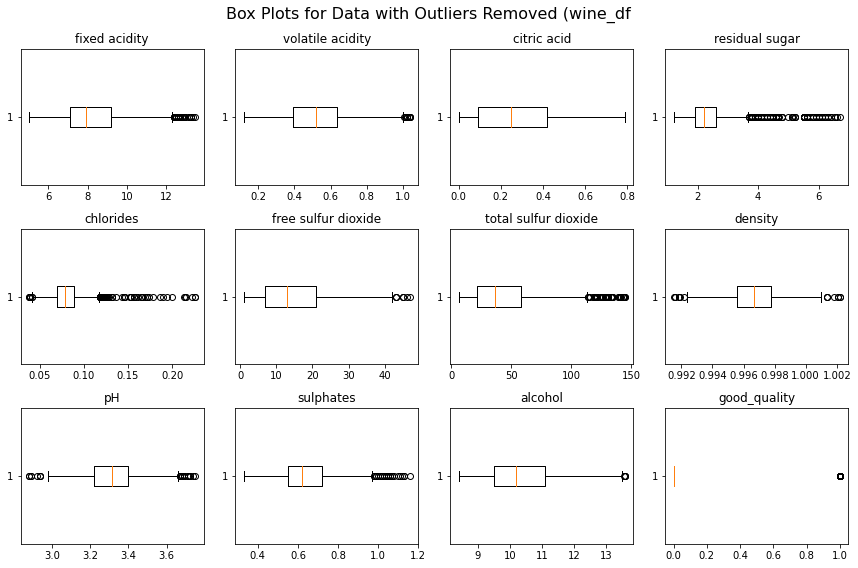

In [19]:
# Create box plots for the original DataFrame (df)
plt.figure(figsize=(12, 8))
plt.suptitle('Box Plots for Original Data (df)', fontsize=16)
for i, column in enumerate(df.columns):
    plt.subplot(3, 4, i + 1)  # Create subplots for each column
    plt.boxplot(df[column], vert=False)  # Create a box plot
    plt.title(column)  # Set the title as the column name

plt.tight_layout()  # Adjust subplot layout for readability

# Create box plots for the DataFrame with outliers removed (df_no_outliers)
plt.figure(figsize=(12, 8))
plt.suptitle('Box Plots for Data with Outliers Removed (wine_df', fontsize=16)
for i, column in enumerate(wine_df.columns):
    plt.subplot(3, 4, i + 1)  # Create subplots for each column
    plt.boxplot(wine_df[column], vert=False)  # Create a box plot
    plt.title(column)  # Set the title as the column name

plt.tight_layout()  # Adjust subplot layout for readability

plt.show()

After removing the outliers in the data, the box plots for **most features have a reduced range** and tighter IQR (interquartile range). This suggests that the extreme values have been successfully taken care of, resulting in a more compact and less skewed distribution for many features. The distribution of `'free sulfur dioxide', 'total sulfur dioxide',  'residual sugar', and 'chlorides'` appear to be less skewed and more centered around the median. We can now move foward to model training and selection.

## Model Training and Selection
We will build a **baseline model** and make a model selection by comparing various classification models, like `Logistic Regression, Support Vector Classifier, K-Nearest Neighbors, and the Random Forest Classifier`. At the end Random Forest Classifier was selected as the best model due to its performance.

But why these models?:

**Logistic Regression:** is a simple and interpretable model that is often used as a baseline model for classification tasks.
- It's particularly useful when the relationship between features and the target variable is approximately linear.

**Support Vector Classifier (SVC):** SVC is a powerful model for both linear and non-linear classification.

- It's effective at finding complex decision boundaries in the data.
Especially useful when there is a clear margin of separation between classes.

**K-Nearest Neighbors (KNN):** is a non-parametric algorithm that classifies data points based on their similarity to neighboring data points.
- It can be a good choice when there's no strong assumption about the data distribution, and it's especially useful for small to medium-sized datasets.

**Random Forest Classifier:** is an ensemble learning method that combines multiple decision trees to make predictions.
- It is known for its robustness, resistance to overfitting, and the ability to handle both categorical and numerical features effectively.

We will start with creating a baseline model.

### Baseline Model:
`Logistic Regression` will serve as a baseline model, and we can later compare more complex models to it to see if they offer improved predictive performance.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline

In [21]:
# Creating varibles
X = wine_df.drop('good_quality', axis=1) 
y = wine_df['good_quality']

In [22]:
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# Create a baseline Logistic Regression model
baseline_model = LogisticRegression(random_state = 42, max_iter=1000)

# Fit baseline model
baseline_model.fit(X_train, y_train)

# Make predictions
y_pred = baseline_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the results
print("Model: Logistic Regression")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

Model: Logistic Regression
Accuracy: 0.8789954337899544
Precision: 0.68
Recall: 0.27419354838709675
F1 Score: 0.39080459770114945
Confusion Matrix:
[[368   8]
 [ 45  17]]


- **Accuracy**: The model has an accuracy of approximately 0.879, which means it correctly classifies around `87.9%` of the instances in the test data.

- **Precision**: The precision is 0.68, which indicates that when the model predicts a positive class (1) -- `good wine quality`, it is correct 68% of the time. In other words, there are some false positives in the predictions.

- **Recall**: The recall is 0.274, which means that the model identifies `27.4%` of the actual positive instances. This suggests that the model misses a significant portion of positive cases, resulting in a relatively low recall.

- **F1 Score**: The F1 score is `0.391`, which is the harmonic mean of precision and recall. It provides a balance between precision and recall. In this case, it indicates that the model's overall performance is moderate.

- **Confusion Matrix**: The confusion matrix reveals that the model correctly predicts 368 instances of the negative class (0) and 17 instances of the positive class (1). However, it also incorrectly predicts 8 instances as positive when they are negative (false positives) and misses 45 positive instances (false negatives).

Baseline Logistic Regression model shows moderate accuracy but has room for improvement, especially in terms of recall. It tends to have **more** false positives and misses a substantial number of actual positive cases. Further model refinement and feature engineering may be necessary to enhance its performance.

### Model Selection:

In [28]:
# Creating a dictionary of classification models
classification_models = {
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest Classifier': RandomForestClassifier()
}

# Creating a pipeline with data preprocessing, feature selection, and model training
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Data Scaling
    ('feature_selector', SelectKBest(score_func=f_classif, k=5)),  # Feature Selection
    ('classifier', None)         # Model Training (to be updated in the loop)
])

# Loop through classification models
for model_name, model in classification_models.items():
    pipeline.set_params(classifier=model)  # Set the current model

    # Training the model on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion = confusion_matrix(y_test, y_pred)

    # Print results for the models
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    print("\n")


Model: Support Vector Classifier
Accuracy: 0.8836
Precision: 0.8739
Recall: 0.8836
F1 Score: 0.8558
Confusion Matrix:
[[372   4]
 [ 47  15]]


Model: K-Nearest Neighbors
Accuracy: 0.8767
Precision: 0.8595
Recall: 0.8767
F1 Score: 0.8624
Confusion Matrix:
[[362  14]
 [ 40  22]]


Model: Random Forest Classifier
Accuracy: 0.8995
Precision: 0.8908
Recall: 0.8995
F1 Score: 0.8854
Confusion Matrix:
[[369   7]
 [ 37  25]]




**Random Forest Classifier** appears to have the highest accuracy and F1 Score among the models, making it a strong candidate. It outperforms the other models in terms of accuracy, precision, recall, and F1 score. It demonstrates a better ability to correctly classify both positive and negative instances while minimizing false positives and false negatives. Therefore, the Random Forest Classifier is the best model among the three for this classification task.

When comaparing to the Logistic Regression baseline model: 
Based on the results, let's compare the best model -- Random Forest Classifier with the baseline Logistic Regression model:

**Random Forest Classifier:**
- Accuracy: 0.8995
- Precision: 0.8908
- Recall: 0.8995
- F1 Score: 0.8854
- Confusion Matrix: 
  [[369, 7],
  [37, 25]]

**Logistic Regression (Baseline):**
- Accuracy: 0.8789954337899544
- Precision: 0.68
- Recall: 0.27419354838709675
- F1 Score: 0.39080459770114945
- Confusion Matrix:
  [[368, 8],
  [45, 17]]


1. **Accuracy**: The Random Forest Classifier outperforms the Logistic Regression model with higher accuracy `0.8995 compared to 0.8789`. It correctly classifies more instances.

2. **Precision**: The Random Forest Classifier also has better precision `0.8908 compared to 0.68`. This indicates that when it predicts a positive class, it is correct almost 90% of the time, whereas the Logistic Regression model has lower precision.

3. **Recall**: The Random Forest Classifier shows significantly higher recall `0.8995` compared to the baseline model's recall of `0.2742`. This means it captures a larger proportion of actual positive instances, addressing one of the shortcomings of the baseline model.

4. **F1 Score**: The F1 Score of the Random Forest Classifier `0.8854` is considerably higher than the baseline model's F1 Score 0.3908. This demonstrates that the Random Forest model provides a better balance between precision and recall.

5. **Confusion Matrix**: The Random Forest Classifier has fewer false negatives `37` compared to the baseline model `45`, which is a crucial improvement. It also has a lower number of false positives `7` compared to the baseline model `8`.

**Random Forest Classifier** significantly outperforms being an appropriate model for this specific problem and dataset.

**Next step**, would be to further fine-tune hyperparameters to improve the model's performance.

### **Hyperparameter Tuning:** 
The next step in our model development process is `hyperparameter` tuning. It is a crucial step in model development that can lead to significant performance gains and ensure that the model is optimized for the specific problem. We will apply this to our Random Forest Classifier's performance. We use techniques like Grid Search with Cross-Validation to fine-tune the model's hyperparameters.

- **Grid Search**: Grid Search is an effective technique for hyperparameter tuning. It searches through a predefined set of hyperparameters, making it suitable for cases where you have a good idea of what hyperparameters to explore.

- **Cross-Validation**: The use of cross-validation helps estimate the model's performance more accurately. By helping detect overfitting by evaluating the model's performance on multiple test subsets.

In [26]:
# Import Grid Search to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Create a pipeline with hyperparameter tuning
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Step 1: Data Scaling
    ('feature_selector', SelectKBest(score_func=f_classif, k=5)),  # Step 2: Feature Selection
    ('classifier', RandomForestClassifier())  # Step 3: Model Training
])

# Hyperparameters to tune
param_grid = {
    'classifier__n_estimators': [100, 150, 200, 250, 300],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Cross-Validation Scores
cv_results = grid_search.cv_results_
mean_cv_scores = cv_results['mean_test_score']
std_cv_scores = cv_results['std_test_score']

# Train the model with the best hyperparameters
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train, y_train)

# Model Evaluation
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)
print("Tuned Random Forest Classifier:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(confusion)

Best Hyperparameters: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 150}
Tuned Random Forest Classifier:
Accuracy: 0.9064
Precision: 0.9001
Recall: 0.9064
F1 Score: 0.8938
Confusion Matrix:
[[370   6]
 [ 35  27]]


**Best Hyperparameters**: The best hyperparameters for the Random Forest Classifier are `{'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 150}`.

After tuning the Random Forest Classifier, we see some improvements in the model's performance compared to the untuned version. Here are the key improvements:

1. **Accuracy Improvement**: The accuracy of the tuned Random Forest Classifier (0.9064) is slightly higher.

2. **Precision Improvement**: Precision, which measures the model's ability to make correct positive predictions, has improved as well.

4. **Recall Improvement**: Recall, which measures the model's ability to correctly identify positive instances, is higher for the tuned model.

5. **F1 Score Improvement**: The F1 score, which combines both precision and recall, has also improved.

6. **Confusion Matrix Improvement**: The confusion matrix shows that the tuned model has fewer false negatives (35) compared to the untuned model (37).

We can look at a visualization from our improvements by creating a **Performance Metrics Radar Chart:** This chart will display multiple performance metrics accuracy, precision, eecall, and F1 score; for both the baseline model and the tuned Random Forest Classifier. 
- To create a radar chart, we will use the `Plotly library`.

In [30]:
# Import plotly
import plotly.express as px

# Create performance metrics for the baseline and tuned models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
baseline_values = [0.8789954337899544, 0.68, 0.27419354838709675, 0.39080459770114945]
tuned_values = [0.9064, 0.9001, 0.9064, 0.8938]

# Create DataFrame for the radar chart
data = {'Metrics': metrics, 'Baseline': baseline_values, 'Tuned Model': tuned_values}
df = pd.DataFrame(data)

# Create radar chart
fig = px.line_polar(df, r='Baseline', theta='Metrics', line_close=True, title="Performance Metrics Comparison")
fig.add_trace(px.line_polar(df, r='Tuned Model', theta='Metrics', line_close=True).data[0])

# Show
fig.show()


We can see here theres bigger coverage on the chart from our `tuned model` than our `untuned model`. Proving to us visually it is a better model. 

### Feature Importance Analysis:
Understanding feature importance helps will help us in discovering which features have the most impact on good wine quality.
- **In our pervious pipeline above we have already found the 5 most influential features.**

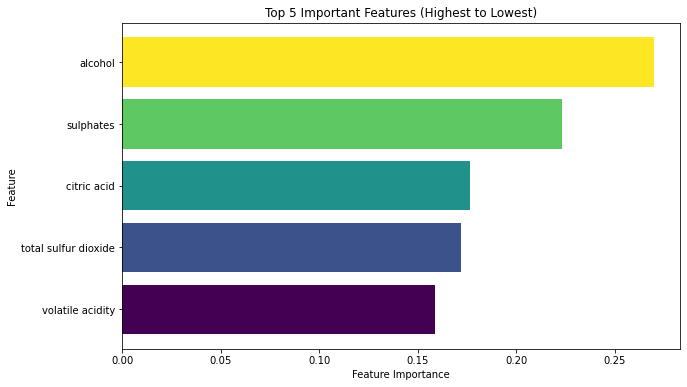

In [31]:
# Get the feature importances from the trained Random Forest Classifier
feature_importances = best_rf_classifier.named_steps['classifier'].feature_importances_

# Get the names of the selected features (top 5 in this case)
selected_feature_names = X_train.columns[best_rf_classifier.named_steps['feature_selector'].get_support()]

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importance using a colormap
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importance_df)))  # Use the viridis colormap

# Sort the data in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 5 Important Features (Highest to Lowest)')

plt.show()


**Selected Features**:

1. **Alcohol**: Alcohol content has a strong positive correlation with wine quality. Higher alcohol content is often associated with better quality wines, as it can contribute to the wine's flavor and body.

2. **Sulphates**: Sulphates, which are sulfur-based compounds, have a positive correlation with wine quality. They can act as preservatives and antioxidants, contributing to the wine's stability and longevity.

3. **Citric Acid**: Citric acid is often used as an additive in winemaking to increase acidity. Its presence can enhance the wine's freshness and tartness, which is desirable for some wine styles.

4. **Total Sulfur Dioxide**: Total sulfur dioxide is an important feature as it can indicate the wine's overall chemical stability. It helps prevent spoilage and oxidation, ensuring that the wine maintains its quality over time.

5. **Volatile Acidity**: Volatile acidity represents the presence of acetic acid in wine, and its selection indicates its importance in predicting wine quality. Low levels of volatile acidity are preferred, as high levels can lead to off-flavors, making the wine less enjoyable.

In [32]:
# Create a boolean mask to filter the rows where 'good_quality' is 1
mask = wine_df['good_quality'] == 1

# Use the mask to select the rows from the original DataFrame
selected_features = wine_df[mask][['alcohol', 'sulphates', 'citric acid', 'total sulfur dioxide', 'volatile acidity']]

# Calculate summary statistics for the selected features
selected_features.describe()

,alcohol,sulphates,citric acid,total sulfur dioxide,volatile acidity
count,201.000000,201.000000,201.000000,201.000000,201.000000
mean,11.518491,0.743035,0.373731,31.064677,0.410423
std,0.940970,0.121829,0.192116,20.723195,0.145665
min,9.500000,0.470000,0.000000,7.000000,0.120000
25%,10.800000,0.650000,0.310000,16.000000,0.310000
50%,11.600000,0.740000,0.400000,25.000000,0.370000
75%,12.200000,0.820000,0.490000,42.000000,0.500000
max,13.600000,1.130000,0.760000,106.000000,0.915000


Based on the summary statistics for the selected features:

**Alcohol:** The mean alcohol content is approximately `11.52%`, with a standard deviation of about 0.94. Wines with good quality tend to have slightly higher alcohol content.

**Sulphates:** Good-quality wines have a mean sulphates content of around `0.74`, with a standard deviation of roughly 0.12. This indicates that wines with higher sulphates content are more likely to be of good quality.

**Citric Acid:** Good-quality wines exhibit a mean citric acid content of approximately `0.37`, with a standard deviation of about 0.19. This shows that maintaining a moderate range of citric acid levels is common in good-quality wines.

**Total Sulfur Dioxide:** The mean total sulfur dioxide content in good-quality wines is around `31.06`, with a standard deviation of about 20.72. Good-quality wines tend to have lower total sulfur dioxide levels.

**Volatile Acidity:** Good-quality wines have a mean volatile acidity of approximately `0.41`, with a standard deviation of around 0.15. This reiterates the importance of keeping volatile acidity low.

- **Next,** we will explore a few more plots to gain more insights after these findings.

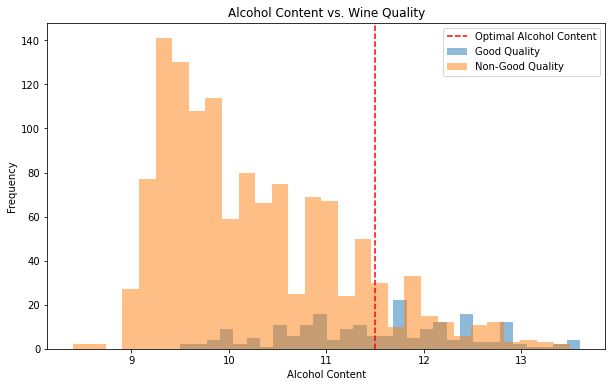

In [33]:
# Visualization code for Alcohol Content
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(wine_df[wine_df['good_quality'] == 1]['alcohol'], bins=30, alpha=0.5, label='Good Quality')
plt.hist(wine_df[wine_df['good_quality'] == 0]['alcohol'], bins=30, alpha=0.5, label='Non-Good Quality')
plt.axvline(11.5, color='r', linestyle='--', label='Optimal Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.legend()
plt.title('Alcohol Content vs. Wine Quality')
plt.show()


#### Alcohol
-  Aiming for an alcohol content above `11.5%` will help maximize the chances of achieving good quality. Wines with higher alcohol content tend to be of good quality.

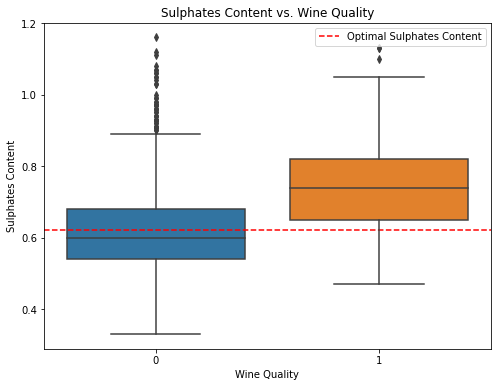

In [34]:
# Visualization code for Sulphates Content
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='good_quality', y='sulphates', data=wine_df)
plt.hlines(y=0.62, xmin=-0.5, xmax=1.5, colors='r', linestyles='--', label='Optimal Sulphates Content')
plt.xlabel('Wine Quality')
plt.ylabel('Sulphates Content')
plt.legend()
plt.title('Sulphates Content vs. Wine Quality')
plt.show()


**Sulphates Content:** 
- Targeting wines with sulphates content above the median value around `0.62` have a better chance of being good quality.

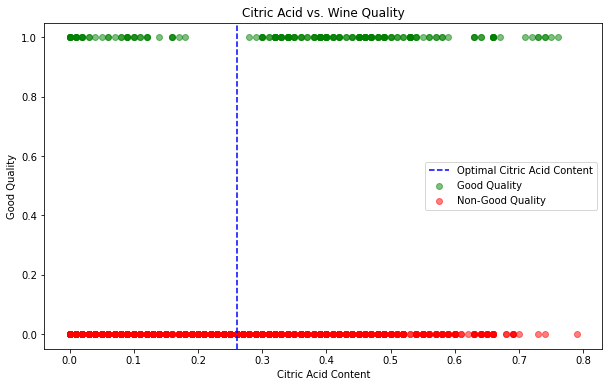

In [35]:
import matplotlib.pyplot as plt

# Define the optimal citric acid content
optimal_citric_acid = 0.26

# Scatter plot with different colors for 'good_quality'
plt.figure(figsize=(10, 6))
plt.scatter(wine_df[wine_df['good_quality'] == 1]['citric acid'], wine_df[wine_df['good_quality'] == 1]['good_quality'], c='g', label='Good Quality', alpha=0.5)
plt.scatter(wine_df[wine_df['good_quality'] == 0]['citric acid'], wine_df[wine_df['good_quality'] == 0]['good_quality'], c='r', label='Non-Good Quality', alpha=0.5)
plt.axvline(optimal_citric_acid, color='b', linestyle='--', label='Optimal Citric Acid Content')
plt.xlabel('Citric Acid Content')
plt.ylabel('Good Quality')
plt.legend()
plt.title('Citric Acid vs. Wine Quality')
plt.show()


**Citric Acid Content:**
Insight: Focus on maintaining a moderate range of citric acid levels (around 0.25) to optimize quality. Citric acid plays a pivotal role in wine production, impacting both its flavor and chemical stabilit.

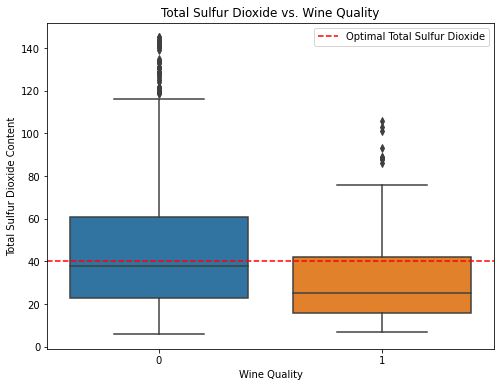

In [36]:
# Visualization code for Total Sulfur Dioxide
plt.figure(figsize=(8, 6))
sns.boxplot(x='good_quality', y='total sulfur dioxide', data=wine_df)
plt.hlines(y=40, xmin=-0.5, xmax=1.5, colors='r', linestyles='--', label='Optimal Total Sulfur Dioxide')
plt.xlabel('Wine Quality')
plt.ylabel('Total Sulfur Dioxide Content')
plt.legend()
plt.title('Total Sulfur Dioxide vs. Wine Quality')
plt.show()

**Total Sulfur Dioxide:**
- Aiming for a total sulfur dioxide content below the median value  around `40` to improve the likelihood of achieving good quality. 

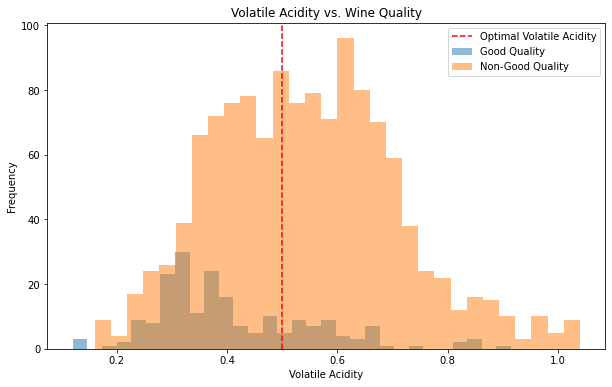

In [37]:
# Visualization code for Volatile Acidity
plt.figure(figsize=(10, 6))
plt.hist(wine_df[wine_df['good_quality'] == 1]['volatile acidity'], bins=30, alpha=0.5, label='Good Quality')
plt.hist(wine_df[wine_df['good_quality'] == 0]['volatile acidity'], bins=30, alpha=0.5, label='Non-Good Quality')
plt.axvline(0.5, color='r', linestyle='--', label='Optimal Volatile Acidity')
plt.xlabel('Volatile Acidity')
plt.ylabel('Frequency')
plt.legend()
plt.title('Volatile Acidity vs. Wine Quality')
plt.show()


**Volatile Acidity:**
- Aiming to keep volatile acidity below a certain threshold - around `0.5`, to maximize wine quality. Good-quality wines have significantly lower volatile acidity.

### Conclusion

**Key Findings and Results:**

After conducting an in-depth analysis and implementing a tuned Random Forest Classifier, we have achieved the following results:

**Hyperparameter Tuning:** After hyperparameter tuning using grid search with cross-validation. The best hyperparameters for the model were identified as `max_depth=20`, `min_samples_leaf=1`, `min_samples_split=2`, and `n_estimators=150`.

**Model Performance:**
- Accuracy: 0.9064
- Precision: 0.9001
- Recall: 0.9064
- F1 Score: 0.8938

**Confusion Matrix:**
- True Positives: 370
- True Negatives: 27
- False Positives: 6
- False Negatives: 35

**Feature Importance Insights:**
We found that the top 5 most influential features in predicting wine quality are:
1. Alcohol: Higher alcohol content is positively correlated with wine quality.
2. Sulphates: Sulphates positively impact wine quality, acting as preservatives and antioxidants.
3. Citric Acid: Citric acid enhances freshness and tartness in wine.
4. Total Sulfur Dioxide: Total sulfur dioxide contributes to chemical stability, preventing spoilage and oxidation.
5. Volatile Acidity: Lower volatile acidity is preferred to avoid off-flavors.

## Recommendations:

- **Maintain Alcohol Levels:** Continue to produce wines with higher alcohol content around 11.5%, as it positively influences wine quality. Ensure consistency in alcohol levels.

- **Sulphate Management:** Manage and monitor sulphate levels above .62, to preserve wine quality. Maintaining the right balance is crucial for preserving wine stability and quality.

- **Citric Acid Usage:** Utilize citric acid strategically to enhance the freshness and tartness of wines where it complements the style. The optimal range for citric acid content is around 0.25.

- **Sulfur Dioxide Monitoring:** Continue to monitor and manage total sulfur dioxide levels to maintain chemical stability and avoid spoilage. Aim for a total sulfur dioxide content below the median value of around 40.

- **Volatile Acidity Control:** Keep volatile acidity at low levels to prevent off-flavors and enhance overall wine enjoyment. The threshold for volatile acidity should be around 0.5.


## Next Steps

The next steps should involve using the insights gained from the analysis to inform and optimize winemaking processes, as well as to enhance the winery's overall business strategy. Here are some recommended next steps:

- **Data Monitoring:** Regularly update the model as new data becomes available to ensure that it continues to provide accurate assessments of wine quality. Monitor the model's performance over time and retrain it if necessary.

- **Data Collection:** Continue to collect and maintain data on chemical properties and quality ratings of wines. A larger and more diverse dataset may further improve the model's predictive capabilities.

- **Further Analysis:** Consider conducting additional analyses to explore other factors that may affect wine quality, such as environmental conditions during grape cultivation, fermentation techniques, and aging processes.

The developed predictive model can be a valuable tool for the winery to maintain and enhance its commitment to delivering exceptional wine quality consistently. It provides insights into the chemical properties that matter most and offers a data-driven approach to winemaking.